In [1]:
%matplotlib inline
import time
from pprint import pprint

import matplotlib.pyplot as plt
import nivapy3 as nivapy
import numpy as np
import pandas as pd
import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split

plt.style.use("ggplot")

# Validation and learning curves

## 1. Select data

In [2]:
# Specify area(s) from which to build train/test dataset
area_list = [1, 3, 6]

# Specify area for 'final' test image (should NOT be in the list above)
pred_area = 2

# Number of samples to use for training and testing
train_size = 1e4
test_size = 1e4

# For repeatability of random numbers
seed = 42

# Scoring metric for model comparison
metric = "accuracy"

# Number of folds for CV
n_folds = 10

# Whether to equalise images using linear histogram stretch
equalise = False

assert (
    pred_area not in area_list
), "'pred_area' should be an independent test i.e. not included in 'area_list'."

In [3]:
# Read train/test image data
df_list = []
for area in area_list:
    df = utils.image_to_sample_df(area, equalise=equalise)
    df_list.append(df)

df = pd.concat(df_list, axis="rows")
del df_list

# Split into training and evaluation
cols = [str(i) for i in range(1, 9)]
X_train, X_eval, y_train, y_eval = train_test_split(
    df[cols],
    df["y"],
    train_size=int(train_size),
    test_size=int(test_size),
    random_state=seed,
    shuffle=True,
)

assert len(X_train) == len(y_train)
assert len(X_eval) == len(y_eval)

print(f"Total number of samples in dataset:      {(len(df) / 1E6):.2f} million.")
print(f"Number of samples in training dataset:   {(len(X_train) / 1E6):.2f} million.")
print(f"Number of samples in evaluation dataset: {(len(X_eval) / 1E6):.2f} million.")

Total number of samples in dataset:      18.87 million.
Number of samples in training dataset:   0.01 million.
Number of samples in evaluation dataset: 0.01 million.


## 2. Model evaluation

### 2.1. Random Forest

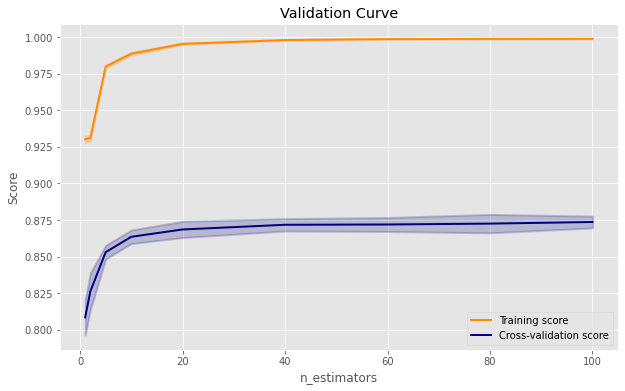

In [4]:
model = RandomForestClassifier(n_jobs=-1)
param_range = [1, 2, 5, 10, 20, 40, 60, 80, 100]
param_name = "n_estimators"

utils.plot_validation_curve(model, X_train, y_train, param_name, param_range, n_folds)

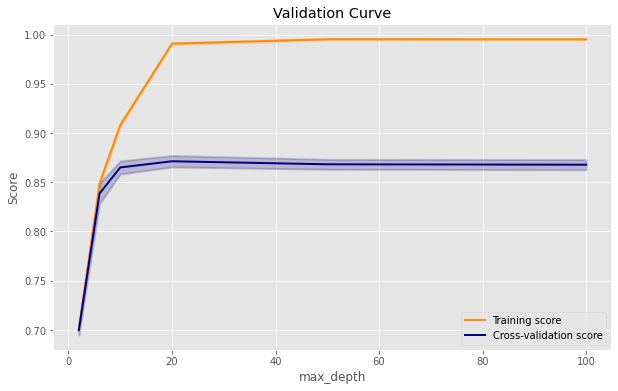

In [5]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=20)
param_range = [2, 6, 10, 20, 50, 100]
param_name = "max_depth"

utils.plot_validation_curve(model, X_train, y_train, param_name, param_range, n_folds)

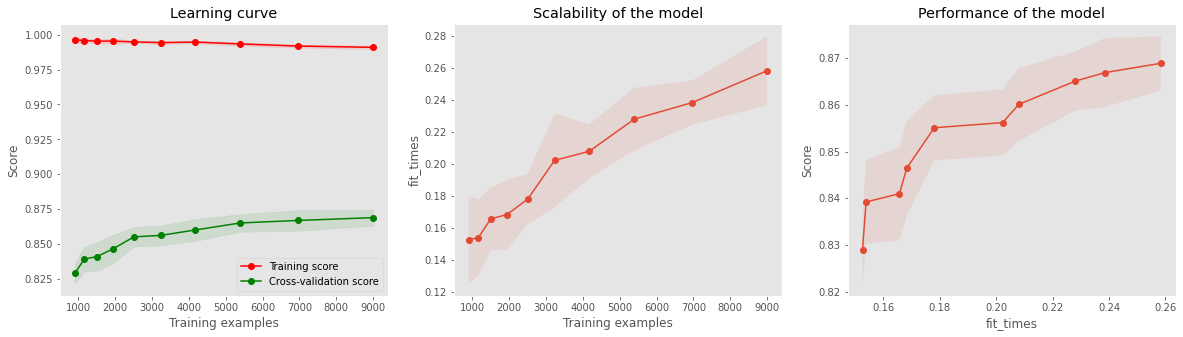

In [6]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=20, max_depth=20)
utils.plot_learning_curve(
    model,
    "Learning curve",
    X_train,
    y_train,
    cv=n_folds,
    n_jobs=-1,
    train_sizes=np.logspace(0.0, 1.0, 10) / 10,#np.linspace(0.1, 1.0, 10),
)

### 2.2. SVC

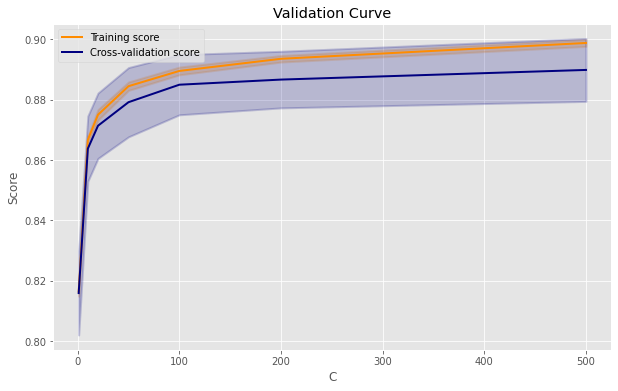

In [7]:
model = SVC(kernel='rbf')
param_range = [1, 10, 20, 50, 100, 200, 500]
param_name = 'C'

utils.plot_validation_curve(model, X_train, y_train, param_name, param_range, n_folds)

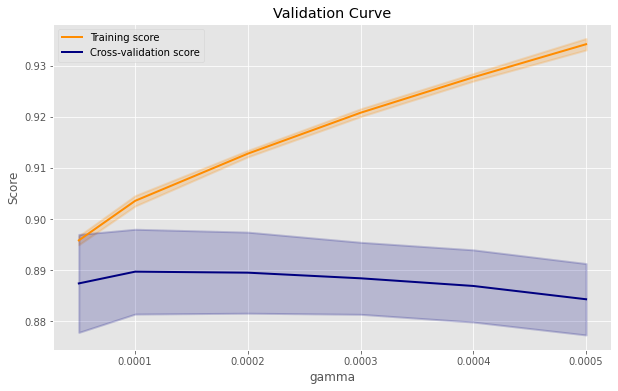

In [8]:
model = SVC(kernel='rbf', C=100)
param_range = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
param_name = 'gamma'

utils.plot_validation_curve(model, X_train, y_train, param_name, param_range, n_folds)

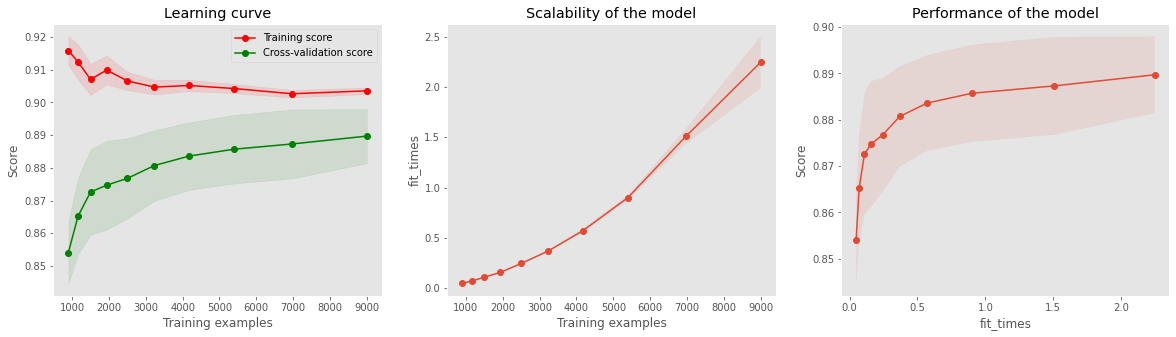

In [9]:
model = SVC(C=100, gamma=0.0001, kernel='rbf')
utils.plot_learning_curve(
    model,
    "Learning curve",
    X_train,
    y_train,
    cv=n_folds,
    n_jobs=-1,
    train_sizes=np.logspace(0.0, 1.0, 10) / 10,#np.linspace(0.1, 1.0, 10),
)